In [1]:
# import relevant libraries
import os
import pandas as pd
import numpy as np
import random

In [2]:
# check my working directory
os.getcwd()

'C:\\Users\\lukas\\Documents\\Ironhack\\official\\Lukas-DH\\0323_2020DATAPAR\\Labs\\module_1\\Pipelines-Project'

In [3]:
# get the file
df = pd.read_csv('GSAF5.csv', encoding= 'cp1252')

In [4]:
# check the file
df.head()

Case Number       Date  Year        Type    Country      Area  \
0  2016.09.18.c  18-Sep-16  2016  Unprovoked        USA   Florida   
1  2016.09.18.b  18-Sep-16  2016  Unprovoked        USA   Florida   
2  2016.09.18.a  18-Sep-16  2016  Unprovoked        USA   Florida   
3    2016.09.17  17-Sep-16  2016  Unprovoked  AUSTRALIA  Victoria   
4    2016.09.15  16-Sep-16  2016  Unprovoked  AUSTRALIA  Victoria   

                           Location Activity             Name Sex   ...  \
0  New Smyrna Beach, Volusia County  Surfing             male    M  ...   
1  New Smyrna Beach, Volusia County  Surfing   Chucky Luciano    M  ...   
2  New Smyrna Beach, Volusia County  Surfing             male    M  ...   
3                  Thirteenth Beach  Surfing  Rory Angiolella    M  ...   
4                       Bells Beach  Surfing             male    M  ...   

    Species        Investigator or Source                        pdf  \
0        NaN  Orlando Sentinel, 9/19/2016       2016.09.18.c-NSB.pdf   
1        NaN  Orlando Sentinel, 9/19/2016   2016.09.18.b-Luciano.pdf   
2        NaN  Orlando Sentinel, 9/19/2016       2016.09.18.a-NSB.pdf   
3        NaN           The Age, 9/18/2016  2016.09.17-Angiolella.pdf   
4  2 m shark           The Age, 9/16/2016  2016.09.16-BellsBeach.pdf   

                                        href formula  \
0  http://sharkattackfile.net/spreadsheets/pdf_di...   
1  http://sharkattackfile.net/spreadsheets/pdf_di...   
2  http://sharkattackfile.net/spreadsheets/pdf_di...   
3  http://sharkattackfile.net/spreadsheets/pdf_di...   
4  http://sharkattackfile.net/spreadsheets/pdf_di...   

                                                href Case Number.1  \
0  http://sharkattackfile.net/spreadsheets/pdf_di...  2016.09.18.c   
1  http://sharkattackfile.net/spreadsheets/pdf_di...  2016.09.18.b   
2  http://sharkattackfile.net/spreadsheets/pdf_di...  2016.09.18.a   
3  http://sharkattackfile.net/spreadsheets/pdf_di...    2016.09.17   
4  http://sharkattackfile.net/spreadsheets/pdf_di...    2016.09.16   

  Case Number.2 original order Unnamed: 22 Unnamed: 23  
0  2016.09.18.c           5993         NaN         NaN  
1  2016.09.18.b           5992         NaN         NaN  
2  2016.09.18.a           5991         NaN         NaN  
3    2016.09.17           5990         NaN         NaN  
4    2016.09.15           5989         NaN         NaN  

[5 rows x 24 columns]

In [5]:
# check columns
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [6]:
# check 
df.shape

(5992, 24)

In [7]:
# check check the nulls
null_cols = df.isnull().sum()
null_cols[null_cols > 0]

round(null_cols[null_cols > 0]/df.shape[0]*100,2)

Country                    0.72
Area                       6.71
Location                   8.28
Activity                   8.80
Name                       3.34
Sex                        9.46
Age                       44.74
Injury                     0.45
Fatal (Y/N)                0.32
Time                      53.62
Species                   48.97
Investigator or Source     0.25
href formula               0.02
href                       0.05
Unnamed: 22               99.98
Unnamed: 23               99.97
dtype: float64

In [8]:
# set the columns that i want
cols = ['Year','Type','Area','Location' , 'Activity','Species ', 'Fatal (Y/N)']


In [9]:
# create a table for the east coast of australia i.e. areas Queensland and Australia
df_EC = df[cols].loc[(df['Country'] == 'AUSTRALIA')  & ((df['Area'] == 'New South Wales')|(df['Area'] == 'Queensland')) & (df['Year'] > 1962)]

In [10]:
# df_QLD = df[cols].loc[(df['Country'] == 'AUSTRALIA')  & (df['Area'] == 'Queensland') & (df['Year'] > 1989)]

In [11]:
#Explor location data
df_EC['Location'].value_counts()

Marineland, Sydney                                             4
Byron Bay                                                      4
Fingal Beach                                                   3
Off Lodestone Reef, Great Barrier Reef, north of Townsville    3
Tallow Beach, Byron Bay                                        3
                                                              ..
Fraser Island                                                  1
Southport Aquarium                                             1
Target Beach                                                   1
Depth of 40 m on the wreck of the St. Paul off Brisbane        1
SeaWorld Theme Park                                            1
Name: Location, Length: 285, dtype: int64

In [12]:
# df_QLD['Location'].value_counts()

In [13]:
# exploration of shark species 
df_EC['Species '].value_counts()[df_EC['Species '].value_counts() > 1 ]

Wobbegong shark                    12
White shark                         7
Grey nurse shark                    6
Bronze whaler shark                 6
1.5 m shark                         5
Bull shark                          5
Shark involvement not confirmed     5
2 m shark                           5
No shark involvement                4
3 m shark                           4
1 m shark                           3
Tiger shark, 5 m [16.5']            3
1.5 m [5'] shark                    3
"a small shark"                     3
12' shark                           2
Blacktip shark                      2
1m shark                            2
White shark, 2.5m                   2
Tiger shark, 3 m                    2
4.6 m [15'] shark                   2
6' shark                            2
1.8 m [6'] shark                    2
Tiger shark, 4 m                    2
Bronze whaler shark, 3 m [10']      2
White shark, 2.5m                   2
Grey nurse shark, 10'               2
Grey nurse s

In [14]:
# df_QLD['Species '].value_counts()[df_QLD['Species '].value_counts() > 1 ]

In [15]:
# checking the reduced data... some species count missing 
null_cols_EC = df_EC.isnull().sum()
null_cols_EC[null_cols_EC > 0]

round(null_cols_EC[null_cols_EC > 0]/df_EC.shape[0]*100,2)

Location        0.59
Activity       10.32
Species        33.63
Fatal (Y/N)     0.29
dtype: float64

In [16]:
# dropping the missing data  but only form fatalities
df_EC_noNA = df_EC.dropna(subset=['Fatal (Y/N)'])

In [17]:
# df_QLD_noNA = df_QLD.dropna(subset=['Species ','Fatal (Y/N)'])

In [18]:
# assigning table with no missing sharks and fatalities
df_EC_s = df_EC_noNA.loc[(df_EC_noNA['Fatal (Y/N)'] == 'N') | (df_EC_noNA['Fatal (Y/N)'] == 'Y')].rename(columns={"Species ": "Species", "Fatal (Y/N)": "Fatal"})

In [19]:
# trying to filter for shark size to put into bins and classify danger since most sharks that fataly injured where tiger, white, or bull and over 3m
df_EC_s['size'] = df_EC_s.Species.str.replace(r"[a-zA-Z]",'')

In [20]:
#checking most common encounters
df_EC_s['Species'].value_counts().head()

Wobbegong shark        12
White shark             7
Grey nurse shark        6
Bronze whaler shark     6
1.5 m shark             5
Name: Species, dtype: int64

In [21]:
df_EC_s.head(1)

Year        Type             Area                Location Activity  \
24  2016  Unprovoked  New South Wales  Sharpes Beach, Ballina  Surfing   

   Species Fatal size  
24     NaN     N  NaN

In [22]:
df_EC_s.loc[(df_EC_s['Area'] == 'Queensland') & (df_EC_s['Fatal'] == 'Y')].count()

Year        26
Type        26
Area        26
Location    26
Activity    22
Species     12
Fatal       26
size        12
dtype: int64

In [23]:
pd.get_dummies(df_EC_s, prefix='Y' , columns=['Fatal'])

Year        Type             Area  \
24    2016  Unprovoked  New South Wales   
28    2016    Provoked       Queensland   
39    2016    Provoked       Queensland   
69    2016  Unprovoked  New South Wales   
77    2016  Unprovoked  New South Wales   
...    ...         ...              ...   
3514  1963    Provoked  New South Wales   
3526  1963    Provoked  New South Wales   
3534  1963  Unprovoked  New South Wales   
3539  1963  Unprovoked  New South Wales   
3540  1963     Invalid  New South Wales   

                                   Location      Activity  \
24                   Sharpes Beach, Ballina       Surfing   
28    20 k off The Spit, off the Gold Coast       Fishing   
39                               Palm Cove        Fishing   
69               First Sun Beach, Byron Bay      Swimming   
77                              Bombo Beach       Surfing   
...                                     ...           ...   
3514                            Wanda Beach       Surfing   
3526                          Clarence Head       Fishing   
3534         Wombarra Beach near Austinmeer  Spearfishing   
3539  Sugarloaf Bay, Middle Harbour, Sydney        Wading   
3540                             Evans Head      Swimming   

                                                Species              size  \
24                                                  NaN               NaN   
28                                       reef shark, 1m               , 1   
39                                    Tawny nurse shark                     
69                                      Wobbegong shark                     
77                                                  NaN               NaN   
...                                                 ...               ...   
3514                                   1.5 m [5'] shark        1.5  [5']    
3526                                   Grey nurse shark                     
3534                    Bronze whaler shark, 3 m [10']        , 3  [10']    
3539  Tooth fragments of “whaler” shark were recover...     “”   ,   ,      
3540                                                NaN               NaN   

      Y_N  Y_Y  
24      1    0  
28      1    0  
39      1    0  
69      1    0  
77      1    0  
...   ...  ...  
3514    1    0  
3526    1    0  
3534    1    0  
3539    0    1  
3540    0    1  

[334 rows x 9 columns]

In [24]:
df_EC_s.groupby(['Area']).count()

Year  Type  Location  Activity  Species  Fatal  size
Area                                                                 
New South Wales   202   202       200       191      140    202   140
Queensland        132   132       132       110       82    132    82

In [25]:
df_EC_s['size_fake'] = np.random.randint(1, 10, df_EC_s.shape[0])

In [26]:
labels=['bottom feeder','fish eater','child eater','man eater','apex predator']

In [27]:
bins=pd.qcut(df_EC_s.size_fake,5,labels=labels)

In [28]:
bins

24        child eater
28        child eater
39      apex predator
69      bottom feeder
77      apex predator
            ...      
3514        man eater
3526        man eater
3534    apex predator
3539        man eater
3540    bottom feeder
Name: size_fake, Length: 334, dtype: category
Categories (5, object): [bottom feeder < fish eater < child eater < man eater < apex predator]

In [29]:
bins.value_counts()

fish eater       85
child eater      75
bottom feeder    67
apex predator    66
man eater        41
Name: size_fake, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5992 entries, 0 to 5991
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case Number             5992 non-null   object
 1   Date                    5992 non-null   object
 2   Year                    5992 non-null   int64 
 3   Type                    5992 non-null   object
 4   Country                 5949 non-null   object
 5   Area                    5590 non-null   object
 6   Location                5496 non-null   object
 7   Activity                5465 non-null   object
 8   Name                    5792 non-null   object
 9   Sex                     5425 non-null   object
 10  Age                     3311 non-null   object
 11  Injury                  5965 non-null   object
 12  Fatal (Y/N)             5973 non-null   object
 13  Time                    2779 non-null   object
 14  Species                 3058 non-null   object
 15  Inve

In [41]:
# df[[i for i in df.columns if i.startswith('case')]]

In [32]:
# df.Date[df.Date.str.split('-').apply(len)==1]

In [33]:
# df.Date[df.Date.str.split('-').apply(len)==1]

In [34]:
compare = df_EC_s.groupby(['Area','Fatal']).count().Year
compare

Area             Fatal
New South Wales  N        182
                 Y         20
Queensland       N        106
                 Y         26
Name: Year, dtype: int64

In [40]:
df_EC_s.head(2)

Year        Type             Area                               Location  \
24  2016  Unprovoked  New South Wales                 Sharpes Beach, Ballina   
28  2016    Provoked       Queensland  20 k off The Spit, off the Gold Coast   

   Activity         Species Fatal  size  size_fake  
24  Surfing             NaN     N   NaN          5  
28  Fishing  reef shark, 1m     N   , 1          6

In [36]:
final=compare.reset_index()

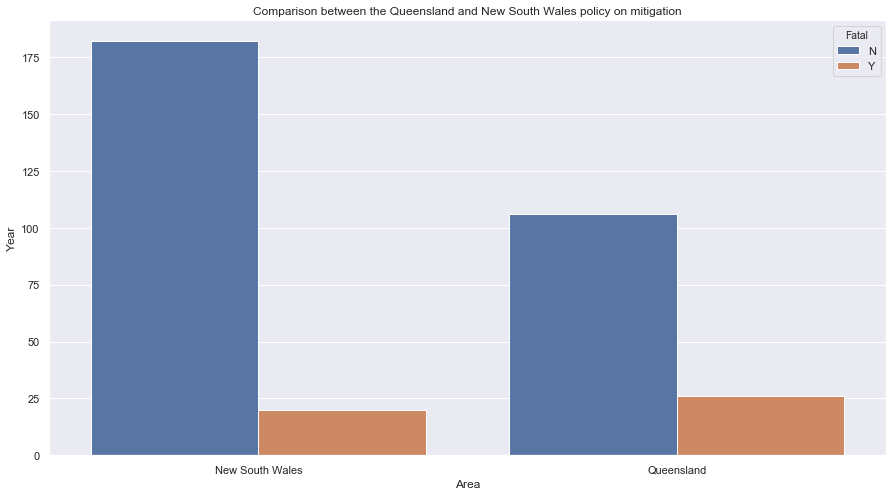

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fig,ax=plt.subplots(figsize=(15,8))
barchart=sns.barplot(data=final, x='Area',y='Year', hue='Fatal')
plt.title("Comparison between the Queensland and New South Wales policy on mitigation")
barchart